In [0]:
%pylab notebook
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!unzip /content/gdrive/My\ Drive/yelp/LV_photos.zip -d /content/yelp_photos
!mkdir data

In [0]:
!cp /content/gdrive/My\ Drive/big-data/* .

In [0]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c menpo cyvlfeat

In [0]:
%%capture
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
from glob import glob
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import os.path as osp
import time as t

from utils import *
import src as sc

In [0]:
data_path = osp.join('..','data')
name_dataset = 'yelp'
limit_count = 31430
vocab_size = 4000
vocab_prefix = 'vocab.h5'
image_path = './yelp_photos/LV_photos'

# load image paths
image_paths, image_ids = load_images(limit_count, image_path)

In [0]:
N = len(image_paths)# Number of samples to take as training set

In [0]:
vocab_filename = str(vocab_size) + vocab_prefix
if not osp.exists(vocab_filename):
  vocab = sc.build_vocabulary(image_paths, vocab_size)
  with h5py.File(vocab_filename, 'w') as hf:
    hf.create_dataset(name_dataset,  data=vocab)
    print('{:s} saved'.format(vocab_filename))
else:
  with h5py.File(vocab_filename, 'r') as hf:
    vocab = hf[name_dataset][:]

In [0]:
feats_filename = 'feats.h5'
image_path_file = 'paths.h5'
image_paths = glob(osp.join(image_path, '*.jpg'))
if not osp.exists(feats_filename):
    train_feats = sc.get_bags_of_sifts(image_paths, vocab)
    with h5py.File(feats_filename, 'w') as hf:
      hf.create_dataset(name_dataset,  data=train_feats)
      print('{:s} saved'.format(feats_filename))
    with h5py.File(image_path_file, 'w') as hf:
      string_dt = h5py.special_dtype(vlen=str)
      hf.create_dataset(name_dataset, data=np.array(image_paths, dtype=object), dtype=string_dt)
      print('{:s} saved'.format(image_path_file))
else:
    with h5py.File(feats_filename, 'r') as hf:
      train_feats = hf[name_dataset][:]
    with h5py.File(image_path_file, 'r') as hf:
      image_paths = hf[name_dataset][:]



## Test

In [48]:
!cp -r ./gdrive/My\ Drive/big-data/test_data .
test_paths = glob(osp.join('test_data', '*.jpg'))
test_feats = sc.get_bags_of_sifts(test_paths, vocab)

Time Taken:  0.0
4,0
Time Taken:  0.03
4,0


In [0]:
predicted_indexes = sc.nearest_neighbor_classify(train_feats, test_feats)

## display some predictions

Populating the interactive namespace from numpy and matplotlib
Finding Best Matches for each image ...
0


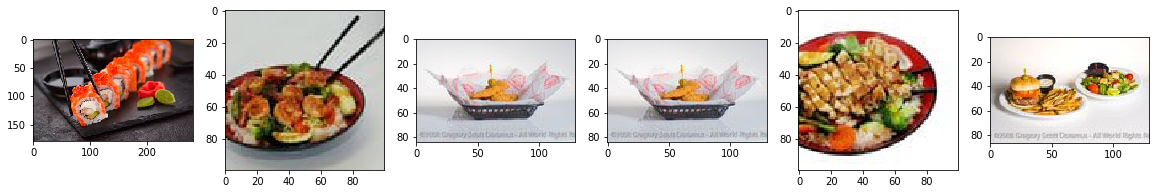

1


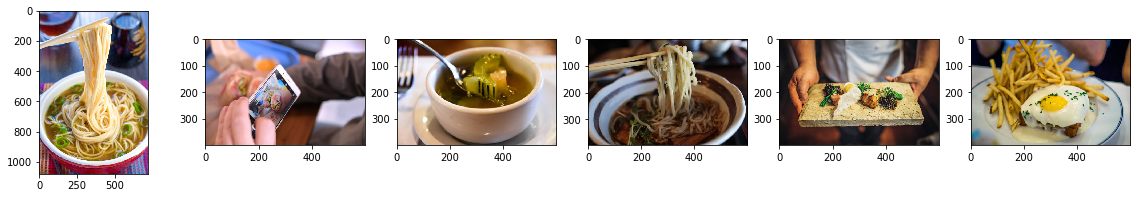

2


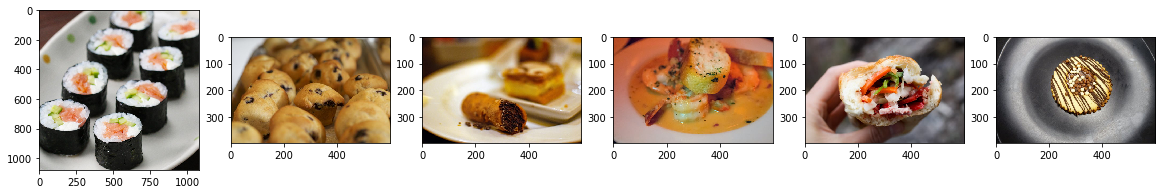

3


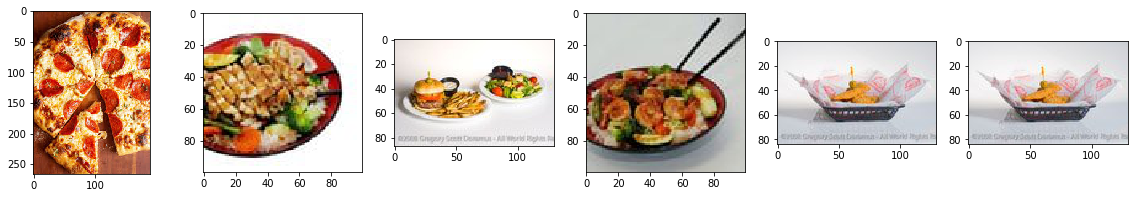

4


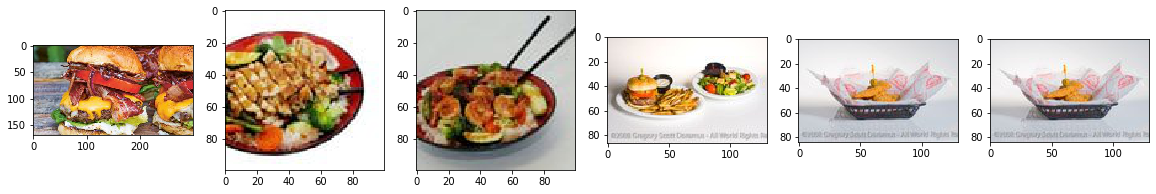

Time Taken:  0.06


In [51]:
%pylab notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
print("Finding Best Matches for each image ...")
start = t.time()
for index, path in enumerate(test_paths):
    num_output = 5
    print(index)
    plt.subplots(1, num_output+1)
    plt.subplot(1, num_output+1, 1)
    plt.imshow(load_gif_color(path))
    for i in range(num_output):
      plt.subplot(1, num_output+1, i+2)
      plt.imshow(load_gif_color(image_paths[predicted_indexes[index, i]]))
    plt.show()
        
end = t.time()
print("Time Taken: ", str(round((end - start)/60, 2)))
# print(branches, maxDepth, result/N, ((result/N).sum())/0.04)
#------------------------------------------------------------------------------------------------------------